In [5]:
# import re
# names = \
# '''
# kang 931111-1233222
# kim 949222-2132232
# '''
# pat = re.compile("\d{6}[-]\d{7}")
# pat.sub("\g<1>-*******", names)

In [6]:
import re

In [8]:
pat = re.compile('[a-z]')
pat.match("deep")
# 이렇게 하면 1글자만!

<re.Match object; span=(0, 1), match='d'>

In [9]:
pat = re.compile('[a-z]+')
pat.match("deep")
# 이렇게 하면 전체로!

<re.Match object; span=(0, 4), match='deep'>

In [13]:
pat = re.compile('[a-z]*')
pat.match("deep")
# 이렇게 하면 전체로!

<re.Match object; span=(0, 4), match='deep'>

In [15]:
pat = re.compile('[a-z]*')
pat.match("hi deep")
# hi만 되누

<re.Match object; span=(0, 2), match='hi'>

In [16]:
pat = re.compile('[ a-z]*')
pat.match("hi deep")
# 스페이스 추가

<re.Match object; span=(0, 7), match='hi deep'>

In [17]:
pat = re.compile('[ a-z6-8]*')
res = pat.match("hi dee77p")
# 걍 1칸 띄면 space 넣은것이다!

<re.Match object; span=(0, 9), match='hi dee77p'>

In [27]:
pat = re.compile('[a-z6-8]+')
res = pat.match("3hi dee77p")
print(res)
# 아무것도 못 찾으면 res가 None임
# 그래서 이런식으로 많이 쓴다
if res: # 객체 저장되었다면
    print('matched')
else: # 매치되이 않았다면 => 객체저장 x
    print('fail')

None
fail


In [29]:
# 그래서 이런식으로 많이 쓴다
pat = re.compile('[ a-z6-8]*')
res = pat.match("hi dee77p")

if res: # 객체 저장되었다면
    print('matched')
    print(res.group())
else: # 매치되이 않았다면 => 객체저장 x
    print('fail')

matched
hi dee77p


In [35]:
pat = re.compile('a-z[0-3]')
res = pat.match("a-z323")

if res: # 객체 저장되었다면
    print('matched')
    print(res.group())
else: # 매치되이 않았다면 => 객체저장 x
    print('fail')

matched
a-z3


In [36]:
pat = re.compile('.{3}')
res = pat.match("a-z323")

if res: # 객체 저장되었다면
    print('matched')
    print(res.group())
else: # 매치되이 않았다면 => 객체저장 x
    print('fail')

matched
a-z


In [37]:
# match는 왼쪽에서부터 차례로! 안맞으면 종료!
pat = re.compile('[a-z]+')
res = pat.match("3 test")
print(res)

None


In [38]:
# search는 문자열 전체 검색!
res = pat.search("3 test")
print(res)

<re.Match object; span=(2, 6), match='test'>


In [42]:
# 만족하는 모든 단어 데려와서 리스트로 리턴!
pat.findall("7 life is too short")

['life', 'is', 'too', 'short']

In [43]:
pat.match('7 life is too short') # None

In [44]:
pat.search('7 life is too short') # 딱 하나씩만

<re.Match object; span=(2, 6), match='life'>

In [50]:
res = pat.finditer('7 life is too short') # iterator객체로 주는 함수!
print(res)
for i in res: # match object의 특성!
    print(i.group()) # string으로
    print(i.start()) # 시작점
    print(i.end()) # 끝점
    print(i.span()) # 범위 (원 문자열 기준)

life
2
6
(2, 6)
is
7
9
(7, 9)
too
10
13
(10, 13)
short
14
19
(14, 19)


In [54]:
# match 그냥 바로 불러서 쓸 수도 있음 : 근데 포맷 만들어서 하는게 생산성은 좋음
re.match('[a-z]+','lookatthat').group()

'lookatthat'

In [63]:
p = re.compile('abcd') # 이렇게 하면 abcd가 다 있어야 한다는 뜻!
res = p.match('abc')
print(res)

None


In [64]:
p = re.compile('(abcd){,2}') # 그룹!
res = p.match('abcd')
print(res)

<re.Match object; span=(0, 4), match='abcd'>


In [65]:
p = re.compile('hello|hi') # or연산자
res = p.findall('hello, nice to meet you, hi!')
print(res)

['hello', 'hi']


In [72]:
pat = re.compile('^Life') # ^를 붙이면 : 문자열의 시작이!
res = pat.findall('Life is too short')
print(res)

['Life']


In [74]:
pat = re.compile('short$') # $를 붙이면 : 문자열의 끝이 short로
res = pat.findall('Life is too short')
print(res)

['short']


In [76]:
# 챗봇(AI로봇) : 대화중인 2명 이상
    # 문자열을 잘 파싱할 수 있어야 학습 소스를 잘 얻을 수 있다!
# 그룹 만들때는 소괄호()
p = re.compile('ABC')
res = p.match('ABCABCALKNL DEF')
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [77]:
p = re.compile('ABC')
res = p.findall('ABCABCALKNL DEF')
print(res)

['ABC', 'ABC']


In [80]:
p = re.compile('[ABC]+')
res = p.match('ABCDABCALKNL DEF')
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [85]:
p = re.compile('(ABC)+')
res = p.match('ABCABCABCNL DEF')
print(res)

<re.Match object; span=(0, 9), match='ABCABCABC'>


In [112]:
# p = re.compile('\w+[ ]{1}010-\d{4}-\d{4}')
p = re.compile('\w+\s+010-\d{4}-\d{4}') # 선생님 방법 # 이렇게 하면 그룹이 2개!
string = '''
I don't wanna know who you are man
kang 010-2222-2222
kim 010-2222-2342
baek 010-2932-2231
it is end of sentence
'''
res = p.findall(string)
# print(res.group())
print(res)

['kang 010-2222-2222', 'kim 010-2222-2342', 'baek 010-2932-2231']


In [117]:
p = re.compile('(\w+)\s+(010-(\d{4})-\d{4})') # 선생님 방법 # 이렇게 하면 그룹이 2개!
string = '''kang 010-2222-2222
kim 010-2222-2342
baek 010-2932-2231
it is end of sentence
'''
res = p.match(string)
# print(res.group())
# 그룹별로 print 가능!
print(res)
print(res.group())
print(res.group(0))
print(res.group(1))
print(res.group(2))
print(res.group(3))

<re.Match object; span=(0, 18), match='kang 010-2222-2222'>
kang 010-2222-2222
kang 010-2222-2222
kang
010-2222-2222
2222


In [119]:
print(re.match('a*b', 'b'))

<re.Match object; span=(0, 1), match='b'>


In [124]:
print(re.match('K?','K'))
print(re.match('K?','K9'))
print(re.match('K.*','K99'))

<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 3), match='K99'>


In [126]:
print(re.match('k{3}','kkabc'))
print(re.match('k{3}','kkkabc'))
print(re.match('(k){3}','kkkabc'))

None
<re.Match object; span=(0, 3), match='kkk'>
<re.Match object; span=(0, 3), match='kkk'>


In [130]:
print(re.match("[a-zA-Z0-9]+","Hello1234"))

<re.Match object; span=(0, 9), match='Hello1234'>


In [139]:
print(re.match("[가-힣]+","할로할로sdㄴㅇㄹㄴ"))

<re.Match object; span=(0, 4), match='할로할로'>


In [143]:
print(re.search("[^A-Z]+","A할로할로sdㄴㅇㄹㄴ")) #대문자 아닌 놈 전부! : 여집합

<re.Match object; span=(1, 11), match='할로할로sdㄴㅇㄹㄴ'>


In [142]:
print(re.match("^[A-Z]+","A할로할로sdㄴㅇㄹㄴ")) # 저건 저걸로 시작해야함

<re.Match object; span=(0, 1), match='A'>


In [154]:
# 숫자로 반드시 끝나야 한다! => 일케하면 앞에 암꺼나오고 숫자로 끝나야 함
print(re.match("\\w+[0-9]*$","A할로할로21ㅁㄴㄹㄴㅇ112"))

<re.Match object; span=(0, 15), match='A할로할로21ㅁㄴㄹㄴㅇ112'>


In [159]:
print(re.search('[*]+',"100 ** 2")) # *이 있는지 없는지 판단
print(re.search('\*+',"100 ** 2")) # *이 있는지 없는지 판단
# 특수문자 쓰고싶으면 \(이스케이프 문자) 사용하라

<re.Match object; span=(4, 6), match='**'>
<re.Match object; span=(4, 6), match='**'>


In [162]:
print(re.search('\[+',"[[[[[]]]]]")) # 이스케이프 문자

<re.Match object; span=(0, 5), match='[[[[['>


In [169]:
a = re.search('([0-9 ]+)','12 212')
print(a)
a.group(0)

<re.Match object; span=(0, 6), match='12 212'>


'12 212'

In [170]:
a = re.search('([0-9]+\\s[0-9]+)','12 212')
a

<re.Match object; span=(0, 6), match='12 212'>

In [172]:
res = re.match('([0-9]+) ([0-9]+)', "100 200")
res.group(1) # 이런식으로 쪼개 쓸 수 있다! - 그룹!

'100'

In [174]:
# 각 그룹의 이름주기!
res = re.match('(?P<ln>[0-9]+) (?P<sn>[0-9]+) (?P<tn>[0-9]+)', '010 2222 2222')
res

<re.Match object; span=(0, 13), match='010 2222 2222'>

In [179]:
res.group('ln') # 이런식으로의 참조가 가능하다!

'010'

In [180]:
re.findall('\\d+','1 2 ads 3 asd 4 6 asd')

['1', '2', '3', '4', '6']

In [206]:
# 문자열은 받아지는데, 뒤가 숫자로 끝나면 안되는 문자열
re.match('.*\\D$', 'hello')

<re.Match object; span=(0, 5), match='hello'>

In [203]:
re.match('.*\\D$', 'hello.world')

<re.Match object; span=(0, 11), match='hello.world'>

In [204]:
re.match('.*\\D$', 'hello.1234')

In [207]:
'asdf'.capitalize()

'Asdf'

In [209]:
'asdfsfdsfd'.count('f')

3

In [210]:
'sfdlfdsln dfs'.startswith('sf')

True

In [211]:
'asfdafsdafsd'.endswith('fsd')

True

In [212]:
'asdfsadfdfs'.find('a')

0

In [213]:
'addfsadfs'.index('fsa')

3

In [214]:
'asfdasdf'.isalpha()

True

In [215]:
'sflafdsfs a'.isalpha() # space

False

In [216]:
'222'.isdecimal()

True

In [217]:
'i am 23'.isalnum()

False

In [218]:
'iam223'.isalnum()

True

In [219]:
import pandas as pd
df = pd.DataFrame({'a':[1,2,3], 'b':[2,3,4]})
df

def mysq(x):
    return x**2

def myexp(x,n):
    return x**n

In [220]:
print(df.apply(mysq))

   a   b
0  1   4
1  4   9
2  9  16


In [225]:
res = df['a'].apply(mysq)
res

0    1
1    4
2    9
Name: a, dtype: int64

In [228]:
df['b'].apply(myexp, n=3) # 인자가 2개일 때는 apply에 인자로 넘겨주면 됨

0     8
1    27
2    64
Name: b, dtype: int64

In [230]:
def prn(x):
    print(x)
    
df.apply(prn, axis=1) # 적용 방향 설정가능

a    1
b    2
Name: 0, dtype: int64
a    2
b    3
Name: 1, dtype: int64
a    3
b    4
Name: 2, dtype: int64


0    None
1    None
2    None
dtype: object

In [236]:
import seaborn as sns
import numpy as np
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [252]:
# 각 컬럼 단위로 결측값의 갯수를 출력
def count_missing(data):
    null_data = pd.isnull(data)
    null_count = np.sum(null_data)
    return null_count # 결측값 갯수 리턴

cmis_col = titanic.apply(count_missing)
cmis_col

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [242]:
# 각 컬럼 단위로 결측값의 비율 출력
def prop_missing(data):
    n = count_missing(data)
    res = n / data.size
    print(data.size)
    return res

titanic.apply(prop_missing)

891
891
891
891
891
891
891
891
891
891
891
891
891
891
891


survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [243]:
titanic.head()
# 아까까지는 열단위로 NaN을 구했기 때문에
# 지금부터는 행단위로 NaN을 구해보겠다!

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [245]:
titanic.apply(count_missing,axis=1).head() #  일케하면 행마다 NaN값 알 수 있다!

0    1
1    0
2    1
3    0
4    1
dtype: int64

In [265]:
def prop_missing_col(data):
    n = data.apply(count_missing,axis=1)
    n = n / data.shape[1]
    return n
prop_missing_col(titanic).head()
# titanic.shape
# titanic.apply(prop_missing_col)

0    0.066667
1    0.000000
2    0.066667
3    0.000000
4    0.066667
dtype: float64

In [266]:
# titanic['num_missing'] = titanic.apply(count_missing,)

In [273]:
df = pd.read_csv("data_0705/gapminder.tsv",sep='\t')
df
df.groupby('year')['pop'].mean()
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [275]:
# 1952년 데이터 출력
y1952 = df[df.year==1952]
y1952.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053


In [276]:
y1952.lifeExp.mean() # 모든국가 기대수명치 평균

49.05761971830987

In [277]:
df.groupby('year').lifeExp.agg(np.mean) # agg란 무엇인가?

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [278]:
df.groupby('year').lifeExp.agg(np.max) # agg란 무엇인가?

year
1952    72.670
1957    73.470
1962    73.680
1967    74.160
1972    74.720
1977    76.110
1982    77.110
1987    78.670
1992    79.360
1997    80.690
2002    82.000
2007    82.603
Name: lifeExp, dtype: float64

In [279]:
df.groupby('year').lifeExp.agg(np.min) # agg란 무엇인가?

year
1952    28.801
1957    30.332
1962    31.997
1967    34.020
1972    35.400
1977    31.220
1982    38.445
1987    39.906
1992    23.599
1997    36.087
2002    39.193
2007    39.613
Name: lifeExp, dtype: float64

In [280]:
df.groupby('year').lifeExp.agg(np.size)

year
1952    142.0
1957    142.0
1962    142.0
1967    142.0
1972    142.0
1977    142.0
1982    142.0
1987    142.0
1992    142.0
1997    142.0
2002    142.0
2007    142.0
Name: lifeExp, dtype: float64

In [308]:
def myMean(v): # 이렇게 col안에서 연산해주는 함수를 만들면
    n = len(v)
    sum = 0
    for val in v:
        sum += val
    return sum / n
myMean(df['lifeExp'])

59.47443936619713

In [302]:
df.shape

(1704, 6)

In [285]:
df.groupby('year').lifeExp.agg(myMean) # groupby로 그룹 객체를 만들어주면 알아서 해줌!

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [286]:
df.groupby('year')['lifeExp'].agg(myMean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [309]:
myMean(df['lifeExp']) # 둘이 같은 결과!

59.47443936619713

In [310]:
v = df['lifeExp'].agg(myMean)
v

59.47443936619713

In [303]:
# 평균대비 몇년정도가 더 작은지 큰지
def avg_sub_now(data,v):
    res = myMean(data)
    return res-v

In [311]:
df.groupby('year')['lifeExp'].agg(avg_sub_now, v=v)

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64

In [317]:
df.groupby('year')['lifeExp'].agg([np.std,np.mean,np.count_nonzero])

,std,mean,count_nonzero
year,,,
1952,12.225956,49.057620,142.0
1957,12.231286,51.507401,142.0
1962,12.097245,53.609249,142.0
1967,11.718858,55.678290,142.0
1972,11.381953,57.647386,142.0
1977,11.227229,59.570157,142.0
1982,10.770618,61.533197,142.0
1987,10.556285,63.212613,142.0
1992,11.227380,64.160338,142.0


In [318]:
df.groupby('year')['lifeExp'].agg({'lifeExp':'std','gdp':'median'})

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,lifeExp,gdp
year,,
1952,12.225956,45.1355
1957,12.231286,48.3605
1962,12.097245,50.8810
1967,11.718858,53.8250
1972,11.381953,56.5300
1977,11.227229,59.6720
1982,10.770618,62.4415
1987,10.556285,65.8340
1992,11.227380,67.7030


In [333]:
def zscore(x):
    return((x-x.mean())/x.std())
df.groupby('year').lifeExp.transform(zscore)

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
5      -1.882224
6      -2.012809
7      -2.121069
8      -2.002813
9      -2.011488
10     -1.919077
11     -1.919936
12      0.504859
13      0.635469
14      0.926719
15      0.899551
16      0.882328
17      0.833673
18      0.825097
19      0.832432
20      0.660943
21      0.686480
22      0.810767
23      0.779886
24     -0.489174
25     -0.476025
26     -0.438633
27     -0.364480
28     -0.274943
29     -0.138606
          ...   
1674   -1.153155
1675   -0.974833
1676   -0.762541
1677   -0.605105
1678   -0.438681
1679   -0.356947
1680   -0.574157
1681   -0.607491
1682   -0.627106
1683   -0.675005
1684   -0.662486
1685   -0.728956
1686   -0.901731
1687   -1.173861
1688   -1.608598
1689   -2.143415
1690   -2.158168
1691   -2.039541
1692   -0.049617
1693   -0.084897
1694   -0.103433
1695   -0.143639
1696   -0.176805
1697   -0.168889
1698   -0.108647
1699   -0.081621
1700   -0.336974
1701   -1.5749

In [336]:
# 연도별로 가장 인기있는 이름은 무엇? 없는 이름은 무엇?
# 자음 - 모음의 변화 : 패턴찾기! : 철자변화!
names1880 = pd.read_csv('babynames/yob1880.txt',
                       names=['Name','Sex','Births'])
names1880.head()

,Name,Sex,Births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [337]:
names1880.shape

(2000, 3)

In [338]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
Name      2000 non-null object
Sex       2000 non-null object
Births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [341]:
names1880.groupby('Sex').Births.sum() # 성별로 group화하여 애들 수를 알고싶기때문!

Sex
F     90993
M    110493
Name: Births, dtype: int64

In [351]:
years = range(1880,2011)
pieces = []
for year in years:
    path = "babynames/yob{}.txt".format(year)
#     path = "babynames/yob%d.txt" % (year)
#     print(path)
    frame = pd.read_csv(path,names=['Name','Sex','Births'])
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True) # 합칠때 ignore_index => True로 주자
# len(pieces)
# 저 1 장 완료
    #     print(frame)
#     print("="*50)
names.head()
names.tail()

,Name,Sex,Births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [348]:
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 33837
Data columns (total 3 columns):
Name      1690784 non-null object
Sex       1690784 non-null object
Births    1690784 non-null int64
dtypes: int64(1), object(2)
memory usage: 51.6+ MB


In [361]:
# 연도와 성별로 데이터를 재구성
# 해당 연도에 몇명 있는지 조사하자
total_births = names.pivot_table(values='Births', index='year',\
                  columns='Sex', aggfunc=sum)
total_births.head()

Sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


In [362]:
import matplotlib.pyplot as plt
import seaborn as sns

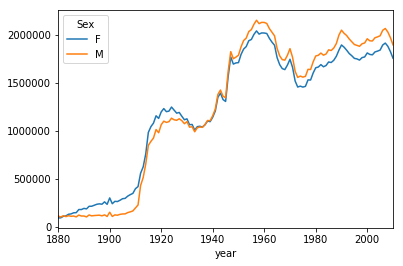

In [363]:
total_births.plot()